In [ ]:
## Install the necessary Libraries (LANGUAGE DETECTION)
!pip install fasttext
!pip install pycountry

     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.7.1-py2.py3-none-any.whl (200 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3094716 sha256=27056f299a04e1d84e47f775a62c2810200029a5ded00b745064054b6607881a
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
     |████████████████████████████████| 10.1 MB 5.1 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=6ea3f64bff9e718fcc856114a9c3757fce43585b7911edeff909593821f657fc
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
import numpy as np
import pandas as pd
import tqdm as tqdm
import itertools
#from google.colab import drive
import matplotlib.pyplot as plt
import scipy.stats as stats

import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import fasttext
from pycountry import languages

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
## Read the data from EXCEL
path='/content/drive/MyDrive/ColabNotebooks/NLP/input_data (1).xlsx'
incidents = pd.read_excel(path)
incidents.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [ ]:
## basic info
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
## Shape
incidents.shape

(8500, 4)

In [ ]:
incidents.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [ ]:
incidents["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [ ]:
incidents["Assignment group"].nunique()

74

In [ ]:
## finding null data points
incidents[incidents.isnull().any(axis=1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

In [ ]:
# drop null data points
incidents.dropna(inplace=True)
incidents.shape

(8491, 4)

In [ ]:
## Finding Duplicate Data points
incidents_copy = incidents[['Short description', 'Description', 'Caller','Assignment group']].copy()
duplicateRowsDF = incidents_copy[incidents_copy.duplicated()]
duplicateRowsDF

Short description  ... Assignment group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]

In [ ]:
# Remove Duplicates
incidents_upd = incidents.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [ ]:
## Group by Categories
df_grp = incidents_upd.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

Assignment group  counts
0             GRP_0    3926
1             GRP_1      31
2            GRP_10     140
3            GRP_11      30
4            GRP_12     257
..              ...     ...
69           GRP_71       2
70           GRP_72       2
71           GRP_73       1
72            GRP_8     645
73            GRP_9     252

[74 rows x 2 columns]

In [ ]:
df_grp.describe()

counts
count    74.000000
mean    113.621622
std     459.823990
min       1.000000
25%       5.250000
50%      26.000000
75%      81.000000
max    3926.000000

**Visualize the Distribution of Records across Groups**

In [ ]:

## distibution by Percentage
df_grp["count"] = round((df_grp["counts"]/incidents.shape[0])*100,2)
df_grp.sort_values(["count"], axis=0, 
                 ascending=False, inplace=True) 

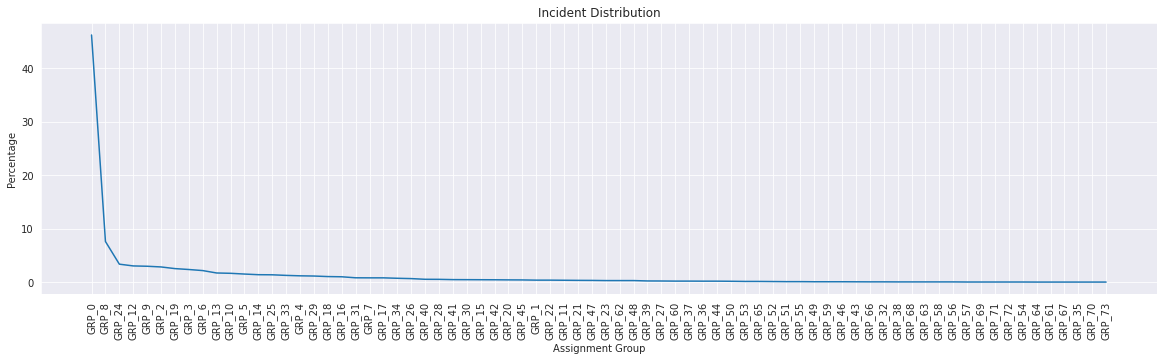

In [ ]:
## View the Distribution of all Records
plt.subplots(figsize = (20,5))
 
plt.plot(df_grp["Assignment group"], df_grp["count"]) 
plt.xlabel('Assignment Group') 
plt.ylabel('Percentage') 
plt.xticks(rotation=90)
plt.title('Incident Distribution') 
  
 
plt.show() 

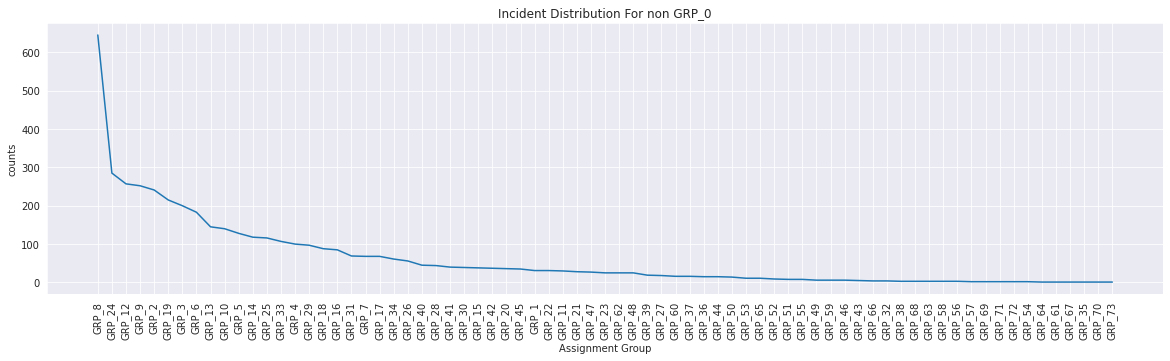

In [ ]:
## Distribution of records that Don't belong to GRP_0
df_non0 = df_grp[df_grp["Assignment group"] != 'GRP_0']
plt.subplots(figsize = (20,5))

plt.plot(df_non0["Assignment group"], df_non0["counts"]) 
plt.xlabel('Assignment Group') 
plt.ylabel('counts') 
plt.xticks(rotation=90)

plt.title('Incident Distribution For non GRP_0') 
  

plt.show() 

**TEXT Processing - CLEANING and Associated activies**

In [ ]:
## merging the Short Description and Description Columns
incidents_sum = pd.DataFrame({"Description": incidents_upd["Short description"] + " " + incidents_upd["Description"],
                             "AssignmentGroup": incidents_upd["Assignment group"]}, 
                                                       columns=["Description","AssignmentGroup"])

Cleaning up the Description column by
* Removing NUmbers - (r'[0-9] , is used for replace, but there are some numbers which remain in the data.. that needs to be tested further
* Converting each character to lowercase character
* Removing HTML Tags
* Removing punctuations
* Removing stopwords
* Removing common words like com, hello
* Stemming was causing invalid words, hence used a lemmatizer

In [ ]:
## NLTK Downloads

nltk.download('stopwords')
stop = set(stopwords.words('english')) 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**Cleaning Data and Lemmatization**





In [ ]:

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


temp =[]
for sentence in incidents_sum["Description"]:
    sentence = sentence.lower()
    #sentence = sentence.str.replace('\d+', '')
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[0-9]', '', sentence, re.I|re.A)
    sentence = re.sub(r'\'', '', sentence, re.I|re.A)
    sentence = re.sub(r'\S+@\S+', 'EmailId', sentence)
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)
    sentence = sentence.lower()
    sentence = re.sub(r'hello ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'com ', ' ', sentence, re.I|re.A)
    l_sentence = lemmatize_sentence(sentence)

    words = [word for word in l_sentence.split() if word not in stopwords.words('english')]
    temp.append(words)

In [ ]:
incidents_sum["Lemmatized_clean"] = temp

**Use Fast Text to detect languages and store it into two additional columns language and accuracy**

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:

import os 
project_path = '/content/drive/MyDrive/ColabNotebooks/NLP'
os.chdir(project_path) 
os.getcwd()

'/content/drive/MyDrive/ColabNotebooks/NLP'

In [ ]:
!wget -O /tmp/lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2021-09-22 14:25:15--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘/tmp/lid.176.bin’

/tmp/lid.176.bin    100%[===================>] 125.18M  20.4MB/s    in 6.7s    

2021-09-22 14:25:23 (18.7 MB/s) - ‘/tmp/lid.176.bin’ saved [131266198/131266198]



In [ ]:
!ls



 glove.6B.50d.txt			       ProcessedData.csv
 glove.6B.zip				       sampleInput.xlsx
'input_data (1).xlsx'			       Sarcasm_Detection.ipynb
 input_data.xlsx			       Sarcasm_Headlines_Dataset.json
 lid.176.bin				       SeqNLP_Project1_Questions.ipynb
 modelInput.xlsx			       SequentialNLP.ipynb
 NLP_Project_Sarcasm_Detection_Answers.ipynb   TempOutput.xlsx


In [ ]:
import fasttext

fasttext.FastText.eprint = lambda x: None
from pycountry import languages
PRETRAINED_MODEL_PATH = '/tmp/lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

temp1 =[]
temp2 = []
for sentence in incidents_sum["Lemmatized_clean"]:
    acc = 0
    try:
      predictions = model.predict(sentence)
      prediction_lang = re.sub('__label__', '',str(predictions[0][0][0]))
      acc = round(predictions[1][0][0],2) * 100
      language_name = languages.get(alpha_2=prediction_lang).name
    except:
      language_name = "NOT DETERMINED"
    temp1.append(language_name)
    temp2.append(acc)

In [ ]:
incidents_sum["Language"] = temp1
incidents_sum["Accuracy"] = temp2

In [ ]:
## Loading data into EXcel to check the output manually (faster)
incidents_sum.to_excel("TempOutput.xlsx")

In [ ]:
incidents_sum

Description  ...    Accuracy
0     login issue -verified user details.(employee# ...  ...   31.999999
1     outlook \r\n\r\nreceived from: hmjdrvpb.komuay...  ...   37.000000
2     cant log in to vpn \r\n\r\nreceived from: eylq...  ...   61.000001
3     unable to access hr_tool page unable to access...  ...   75.999999
4                             skype error  skype error   ...   22.000000
...                                                 ...  ...         ...
8495  emails not coming in from zz mail \r\n\r\nrece...  ...   58.999997
8496  telephony_software issue telephony_software issue  ...   43.000001
8497  vip2: windows password reset for tifpdchb pedx...  ...   23.999999
8498  machine nÃ£o estÃ¡ funcionando i am unable to ...  ...   50.999999
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...  100.000000

[8408 rows x 5 columns]

In [ ]:
## Additional Text Cleaning
##There are rows which contain junk characters and by using lemmatization they are replaced with blank spaces.

incidents_sum1 = incidents_sum[incidents_sum['Lemmatized_clean'].map(lambda d: len(d)) > 0]

**Word Cloud Visualization - Vizualizing word clouds for GRP_0, Non GRP_0 and some other Groups that had a higher number of Incidents**

In [ ]:
## GRP_0 Visualization:

## create a column to mark records with GRP_0 and non GRP_0=>GRP_X
incidents_sum1['GRP_MOD'] = incidents_sum1['AssignmentGroup'].apply(lambda x: 'GRP_X' if x != 'GRP_0' else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
incidents_sum1

Description  ... GRP_MOD
0     login issue -verified user details.(employee# ...  ...   GRP_0
1     outlook \r\n\r\nreceived from: hmjdrvpb.komuay...  ...   GRP_0
2     cant log in to vpn \r\n\r\nreceived from: eylq...  ...   GRP_0
3     unable to access hr_tool page unable to access...  ...   GRP_0
4                             skype error  skype error   ...   GRP_0
...                                                 ...  ...     ...
8495  emails not coming in from zz mail \r\n\r\nrece...  ...   GRP_X
8496  telephony_software issue telephony_software issue  ...   GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...   GRP_0
8498  machine nÃ£o estÃ¡ funcionando i am unable to ...  ...   GRP_X
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...   GRP_X

[8372 rows x 6 columns]

In [ ]:
stopwords = set(STOPWORDS)
## function to create Word Cloud
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=150,
        max_font_size=40, 
        scale=3,
        random_state=5
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

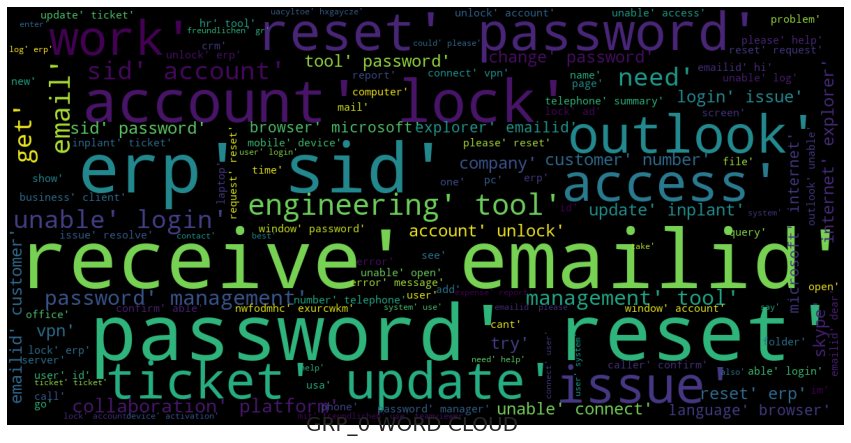

In [ ]:
## view word cloud for GRP_0
text_Str = incidents_sum1['Lemmatized_clean'][incidents_sum1['GRP_MOD'].isin(["GRP_0"])].tolist()
show_wordcloud(text_Str, "GRP_0 WORD CLOUD")

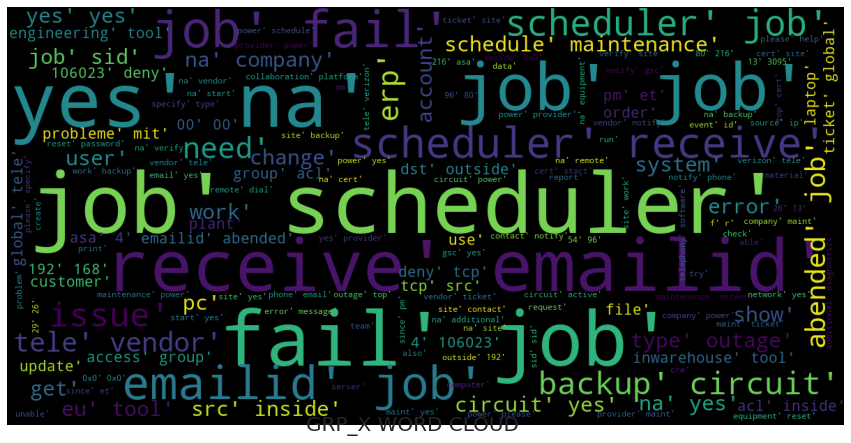

In [ ]:
## GRP_X Visualization:
text_Str = incidents_sum1['Lemmatized_clean'][incidents_sum1['GRP_MOD'].isin(["GRP_X"])].tolist()
show_wordcloud(text_Str, "GRP_X WORD CLOUD")

**Word Clouds for Groups that have higher incidents other than GRP_0**

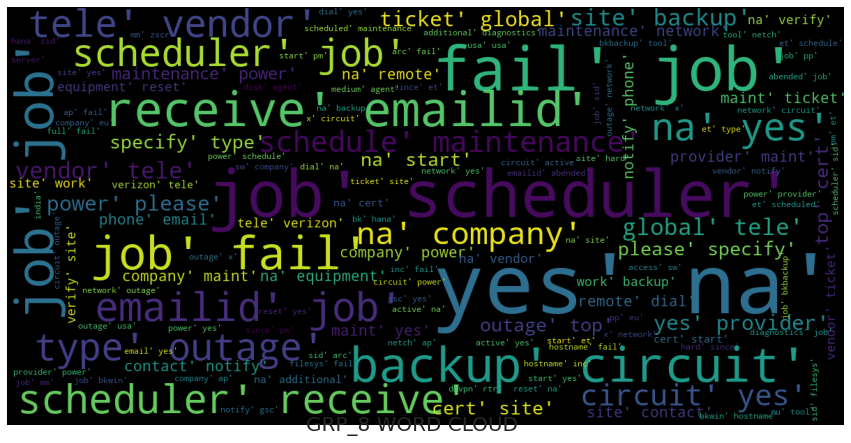

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_8"])].tolist()
show_wordcloud(text_Str1,"GRP_8 WORD CLOUD" )

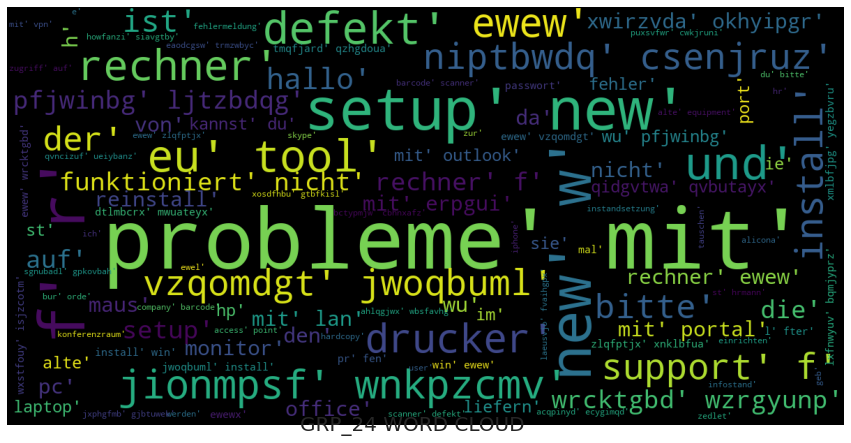

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_24"])].tolist()
show_wordcloud(text_Str1,"GRP_24 WORD CLOUD" )

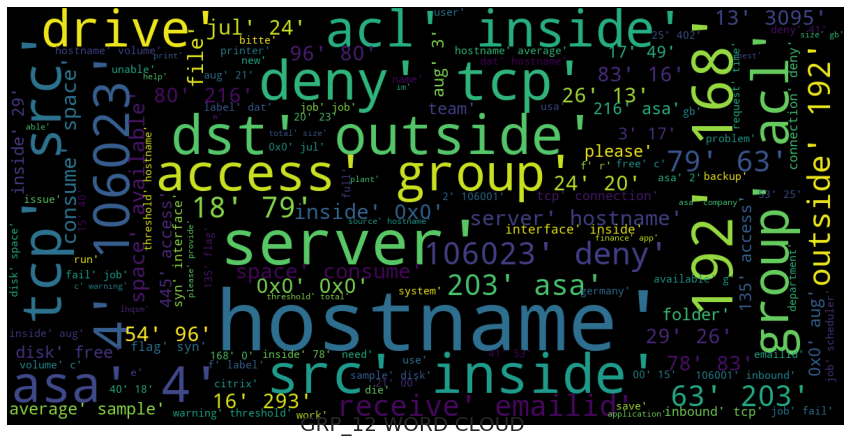

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_12"])].tolist()
show_wordcloud(text_Str1,"GRP_12 WORD CLOUD" )

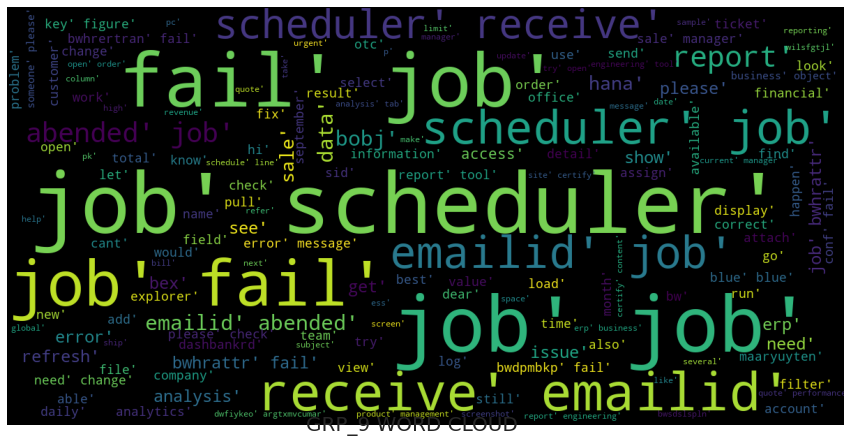

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_9"])].tolist()
show_wordcloud(text_Str1,"GRP_9 WORD CLOUD" )

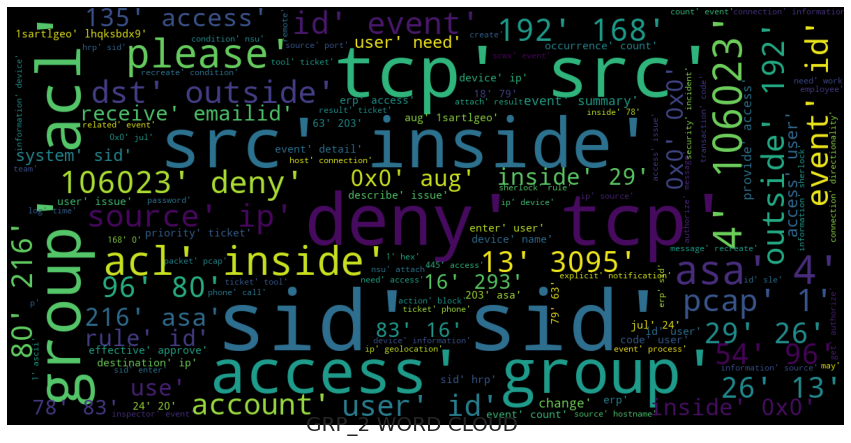

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_2"])].tolist()
show_wordcloud(text_Str1,"GRP_2 WORD CLOUD" )

**Word Clouds for some random Groups**

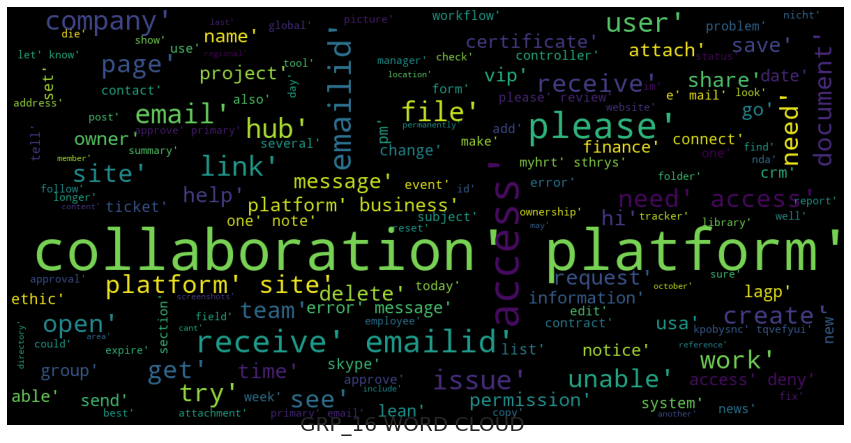

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_16"])].tolist()
show_wordcloud(text_Str1,"GRP_16 WORD CLOUD" )

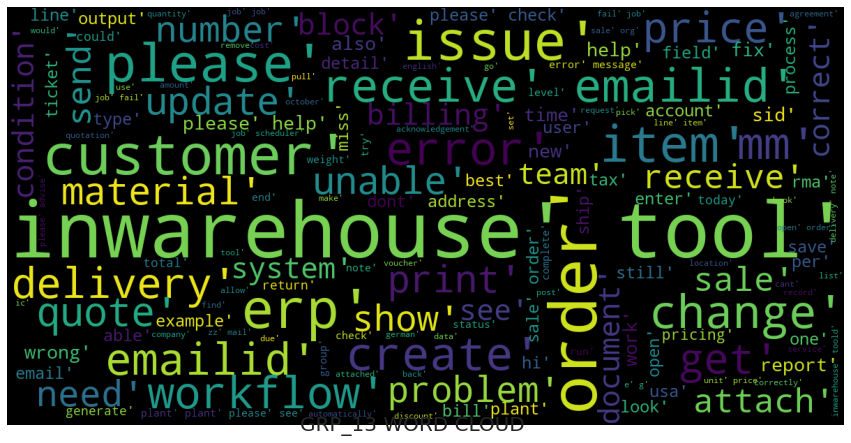

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_13"])].tolist()
show_wordcloud(text_Str1,"GRP_13 WORD CLOUD" )

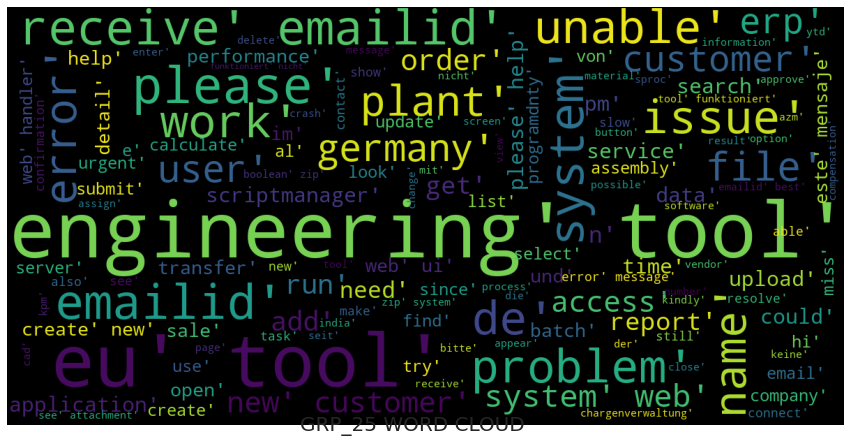

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_25"])].tolist()
show_wordcloud(text_Str1,"GRP_25 WORD CLOUD" )

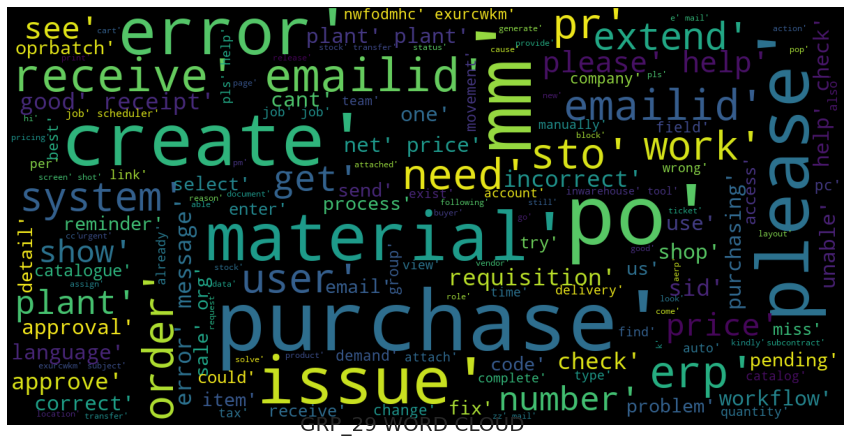

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_29"])].tolist()
show_wordcloud(text_Str1,"GRP_29 WORD CLOUD" )

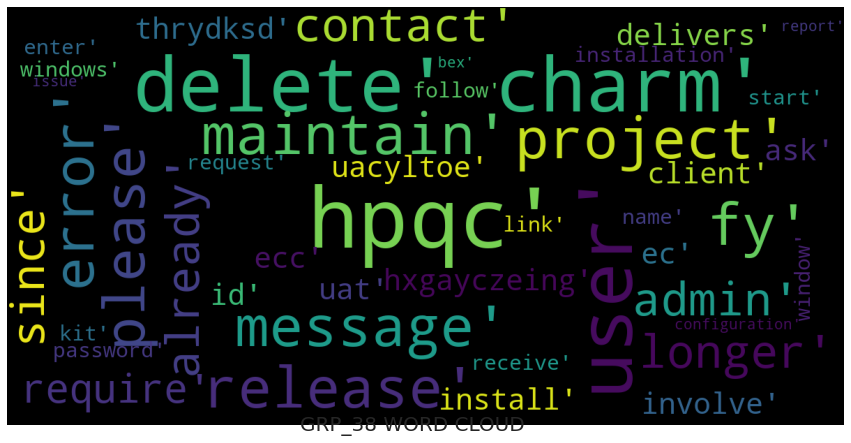

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_38"])].tolist()
show_wordcloud(text_Str1,"GRP_38 WORD CLOUD" )

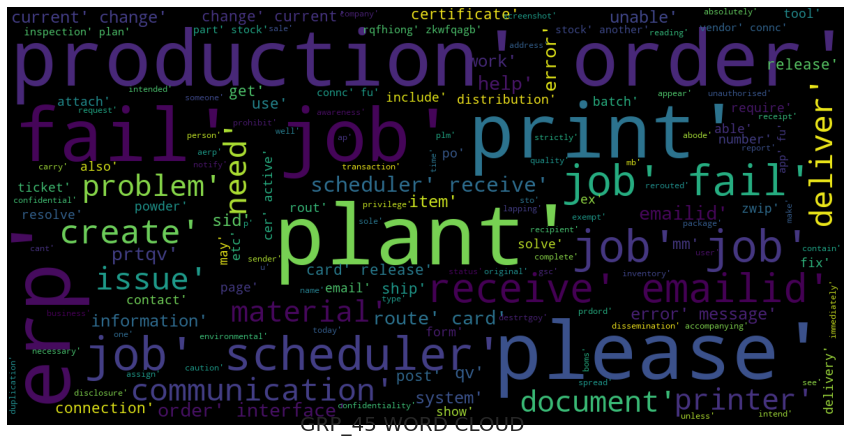

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_45"])].tolist()
show_wordcloud(text_Str1,"GRP_45 WORD CLOUD" )

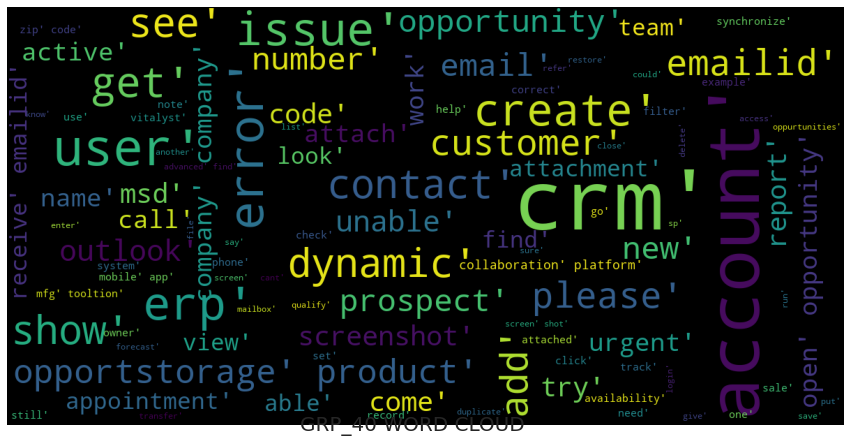

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_40"])].tolist()
show_wordcloud(text_Str1,"GRP_40 WORD CLOUD" )

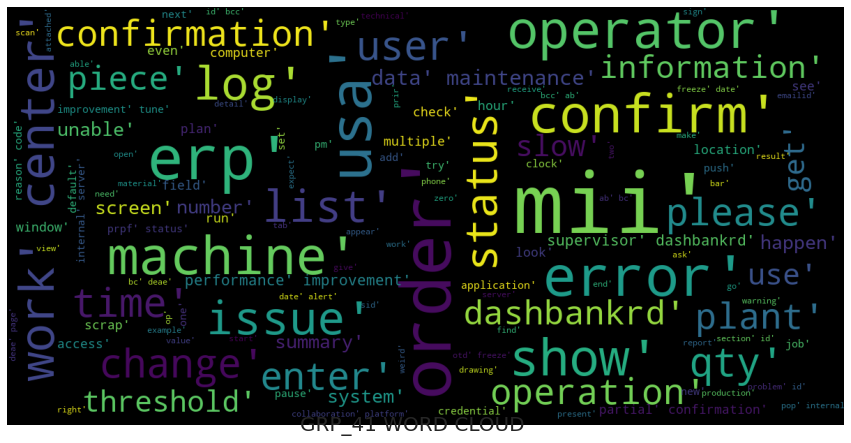

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_41"])].tolist()
show_wordcloud(text_Str1,"GRP_41 WORD CLOUD" )

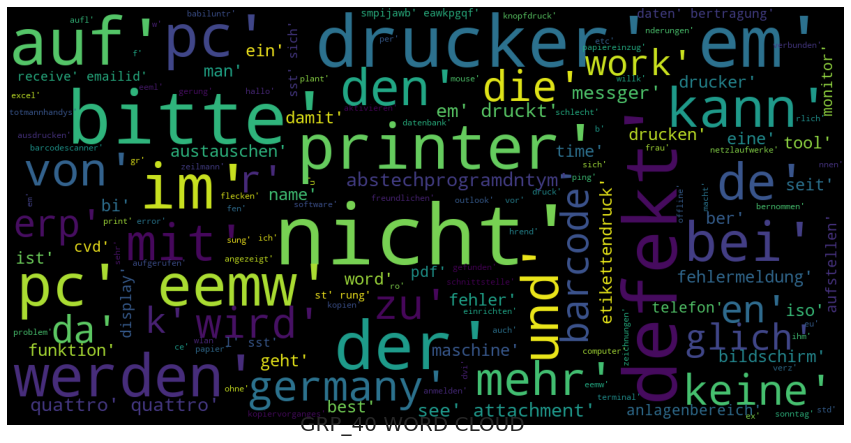

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_42"])].tolist()
show_wordcloud(text_Str1,"GRP_40 WORD CLOUD" )

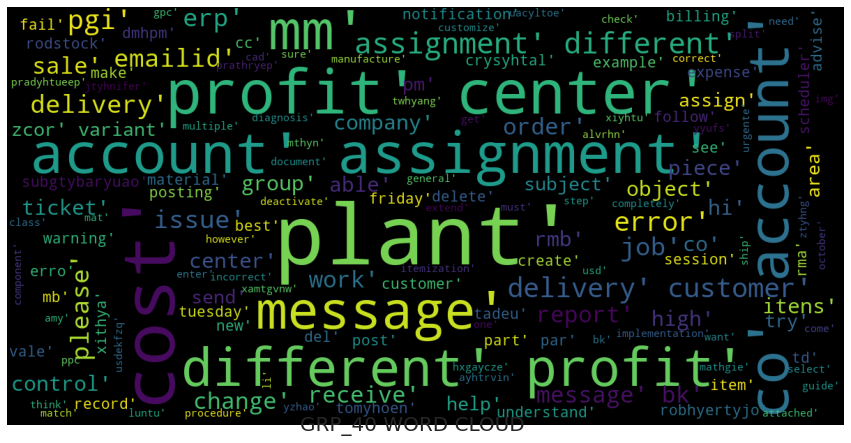

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_44"])].tolist()
show_wordcloud(text_Str1,"GRP_40 WORD CLOUD" )

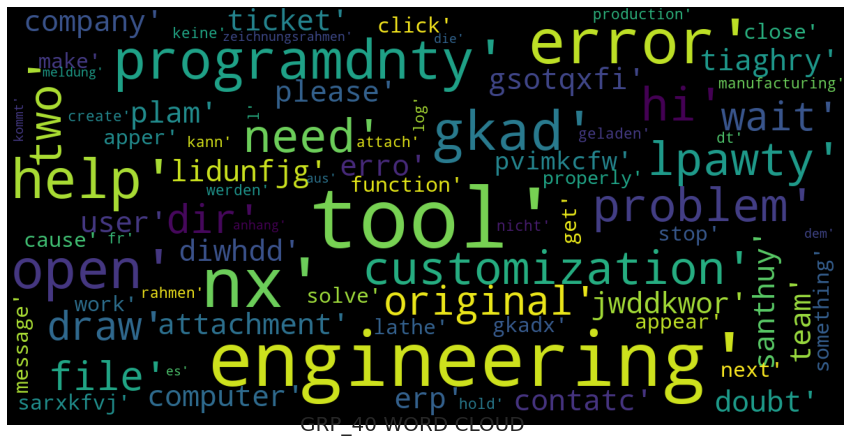

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_46"])].tolist()
show_wordcloud(text_Str1,"GRP_40 WORD CLOUD" )

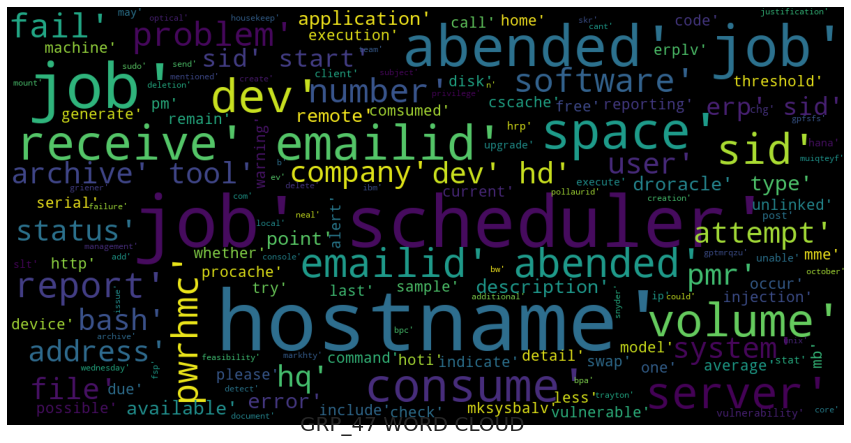

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_47"])].tolist()
show_wordcloud(text_Str1,"GRP_47 WORD CLOUD" )

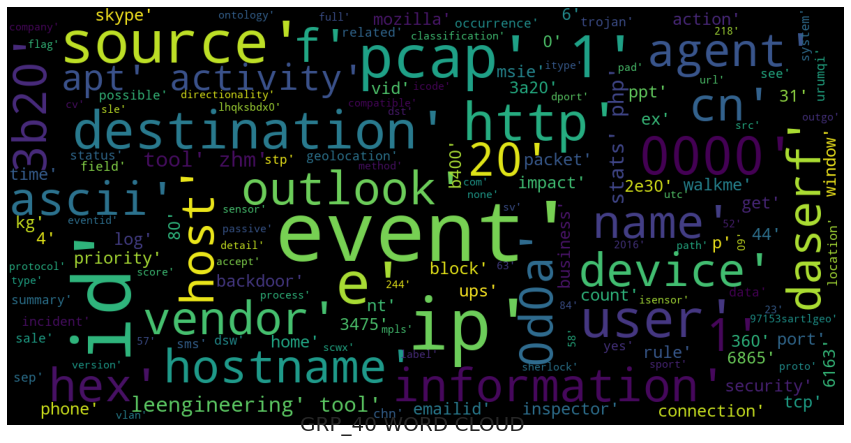

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_48"])].tolist()
show_wordcloud(text_Str1,"GRP_40 WORD CLOUD" )

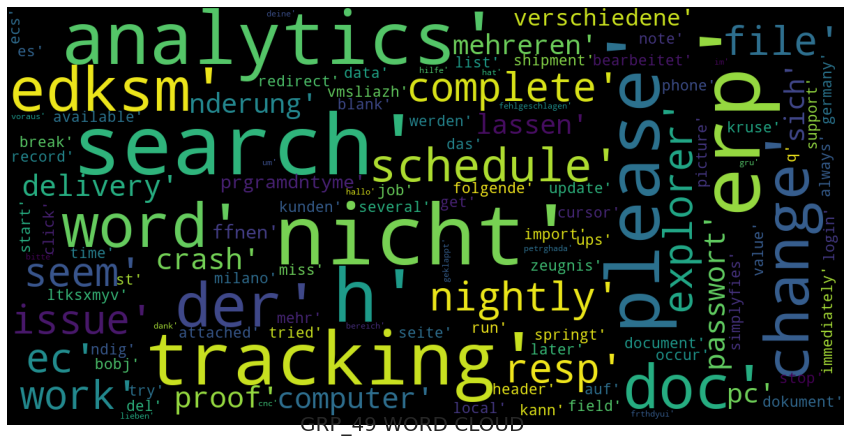

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_49"])].tolist()
show_wordcloud(text_Str1,"GRP_49 WORD CLOUD" )

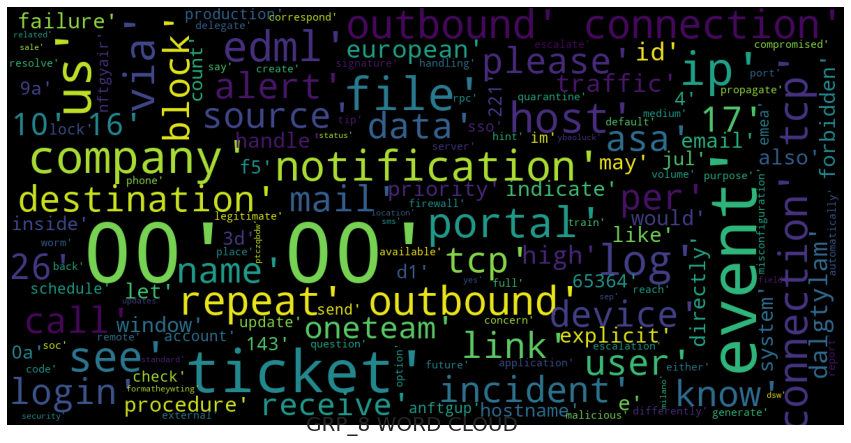

In [ ]:
text_Str1 = incidents_sum['Lemmatized_clean'][incidents_sum['AssignmentGroup'].isin(["GRP_69","GRP_70","GRP_71","GRP_72","GRP_73"])].tolist()
show_wordcloud(text_Str1,"GRP_8 WORD CLOUD" )

**Find Optimal Clusters - Visualize Elbow Method**

In [ ]:
def optimal_clusters(data, max_k):
    iter = range(2, max_k+1, 2)
    print ("iteration", iter)
    sse = []
    for k in iter:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=200, batch_size=300, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1,figsize=(15,5))
   
    ax.plot(iter, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iter)
    ax.set_xticklabels(iter)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    plt.show()



In [ ]:
  ## Function to PLot the Clusters using Tsne and PCA
  def plot_tsne_pca(data, labels, size_d, component_count):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=size_d, replace=False)
    
    pca = PCA(n_components=component_count).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=component_count).fit_transform(data[max_items,:].todense()))
    
    
    idc = np.random.choice(range(pca.shape[0]), size=size_d, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idc]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idc, 0], pca[idc, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idc, 0], tsne[idc, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

**TFIDF Vectorization**

Using TFIDF Vectorization to convert the Words to number vectors.
Afterwards, we will use clustering mechanisms to see if there are clusters that can be visualized. We will use KMeans to find out the Optimal number of Clusters and visualize.



In [ ]:
# creating the vectorizer
tfidf = TfidfVectorizer(min_df=5 ,use_idf=True )

## joining the list of column
incidents_sum1['Lemmatized_clean_upd']=[" ".join(description) for description in incidents_sum1['Lemmatized_clean'].values]

## From the word clouds it was noticed that the earlier Regular Expression replacement of numbers did not work
incidents_sum1['Lemmatized_clean_upd'] = incidents_sum1['Lemmatized_clean_upd'].str.replace('\d+', '')


## fitting the vectorizer
tfidf.fit(incidents_sum1.Lemmatized_clean_upd)
text = tfidf.transform(incidents_sum1.Lemmatized_clean_upd)

## Get Feature Names and Store the values in a Dataframe
tf_matrix = text.toarray()
vocab = tfidf.get_feature_names()
tf_df = pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)

## View the nunmber of Features
tf_df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['aa', 'ab', 'abap', 'abend', 'abended', 'aber', 'ability', 'able',
       'abort', 'aborted',
       ...
       'zlettel', 'zone', 'zscr', 'zsd', 'zu', 'zugriff', 'zum', 'zur',
       'zusammen', 'zz'],
      dtype='object', length=2380)

In [ ]:
tf_df.shape

(8372, 2380)

iteration range(2, 74, 2)
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters


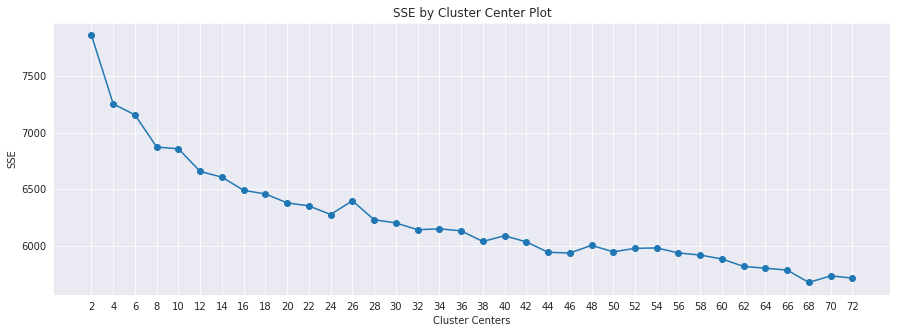

In [ ]:
optimal_clusters(text, 73)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=34, init_size=100, batch_size=200, random_state=20).fit_predict(text)
clusters.shape

(8372,)

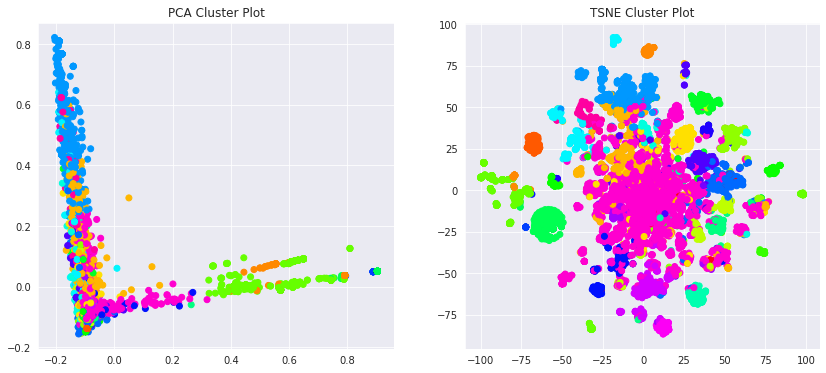

In [ ]:
num_features = 8372
pca_comp_count = 100
plot_tsne_pca(text, clusters,num_features,pca_comp_count )

iteration range(2, 74, 2)
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters


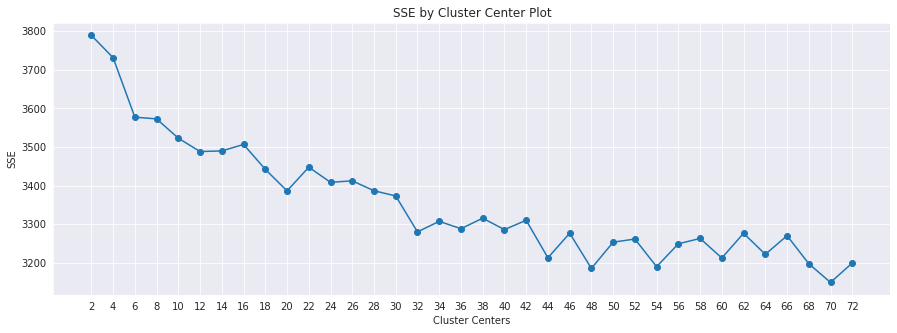

In [ ]:
df = incidents_sum1.copy()
df.drop(columns=["Description","Lemmatized_clean","Language","Accuracy"], inplace=True)
df1 = df[df["GRP_MOD"] == "GRP_X"]

tfidf = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tfidf.fit(df1.Lemmatized_clean_upd)
text1 = tfidf.transform(df1.Lemmatized_clean_upd)

tf_matrix = text1.toarray()
vocab = tfidf.get_feature_names()
tf_df = pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)
optimal_clusters(text1, 73)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=32, init_size=100, batch_size=200, random_state=20).fit_predict(text1)
clusters.shape

(4447,)

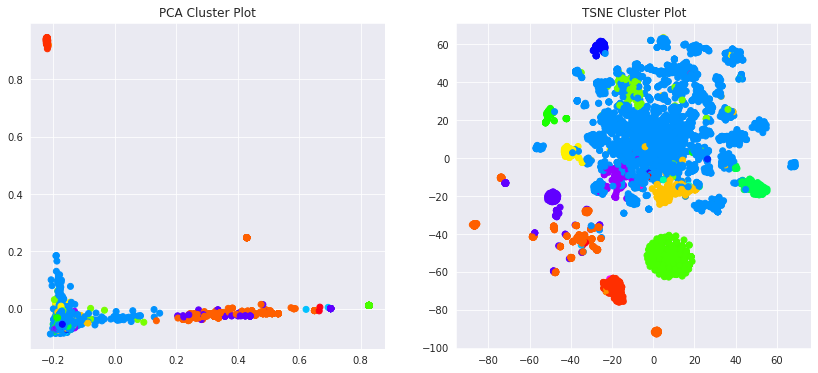

In [ ]:
num_features = 4447
pca_comp_count = 100
plot_tsne_pca(text1, clusters,num_features,pca_comp_count )

In [ ]:
 df1[df1["GRP_MOD"] == "GRP_X"]

AssignmentGroup GRP_MOD                               Lemmatized_clean_upd
6              GRP_1   GRP_X  event critical hostname company value mountpoi...
17             GRP_3   GRP_X  undocking pc screen come back undocking pc scr...
32             GRP_4   GRP_X  duplication network address receive emailid ge...
43             GRP_5   GRP_X  please reroute job printer printer issue need ...
47             GRP_6   GRP_X  job job fail job scheduler receive emailid job...
...              ...     ...                                                ...
8493          GRP_10   GRP_X  erp fi ob two account add sorry another two ac...
8494           GRP_3   GRP_X  tablet need reimaged due multiple issue crm wi...
8495          GRP_29   GRP_X  email come zz mail receive emailid good aftern...
8498          GRP_62   GRP_X  machine n est funcionando unable access machin...
8499          GRP_49   GRP_X  mehreren pc lassen sich verschiedene prgramdnt...

[4447 rows x 3 columns]

In [ ]:
## Copying all data into a new dataframe and use it to select top features 
## for segregrating between Group 0 and Group X. Because using all the features
## generated by TFIDF will take lot of time for models.

from sklearn.feature_selection import SelectKBest

model_data = df.copy()



In [ ]:
df.head()

AssignmentGroup GRP_MOD                               Lemmatized_clean_upd
0           GRP_0   GRP_0  login issue verify user detail employee manage...
1           GRP_0   GRP_0  outlook receive emailid team meeting skype mee...
2           GRP_0   GRP_0       cant log vpn receive emailid hi log vpn best
3           GRP_0   GRP_0  unable access hr tool page unable access hr to...
4           GRP_0   GRP_0                            skype error skype error

In [ ]:
df.head()
!pwd

df.to_excel("modelInput.xlsx")

/content/drive/My Drive/ColabNotebooks/NLP


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
import  numpy, textblob, string

## split the data into Train and Text (0.75)

train_x, test_x, train_y, test_y = model_selection.train_test_split(df['Lemmatized_clean_upd'], df['GRP_MOD'], test_size=0.25, random_state=42)

In [ ]:
## encoding GRP_X and GRP_0 variable

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [ ]:
tfidf_vect = TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}', max_features=3000)
tfidf_vect.fit(df['Lemmatized_clean_upd'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(test_x)

#Training Models

In [ ]:
## common function for Classifiers
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    
    # predicting labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    #return metrics.accuracy_score(predictions, test_y)
    return predictions


def cal_accuracy(model_name, y_test, y_pred): 

    print ("############  Model Used: ",model_name, " ####################")
    print("Confusion Matrix:\n ", 
        metrics.confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    metrics.accuracy_score(y_test,y_pred)*100) 
    
    print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))
    print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
      
    print("Report : ", 
    metrics.classification_report(y_test, y_pred))

In [ ]:
## naive Bayes
# Naive Bayes on Word Level TF IDF Vectors
model_name = "Naive Bayes"
pred_result = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
cal_accuracy (model_name,test_y, pred_result)
#print("NB, WordLevel TF-IDF: ", accuracy)

############  Model Used:  Naive Bayes  ####################
Confusion Matrix:
  [[856 113]
 [233 891]]
Accuracy :  83.46870520783565
Recall: 0.79
Precision: 0.89
Report :                precision    recall  f1-score   support

           0       0.79      0.88      0.83       969
           1       0.89      0.79      0.84      1124

    accuracy                           0.83      2093
   macro avg       0.84      0.84      0.83      2093
weighted avg       0.84      0.83      0.83      2093



In [ ]:
model_name = "Logistic Regression"
pred_result = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
cal_accuracy (model_name,test_y, pred_result)


############  Model Used:  Logistic Regression  ####################
Confusion Matrix:
  [[798 171]
 [160 964]]
Accuracy :  84.18537983755375
Recall: 0.86
Precision: 0.85
Report :                precision    recall  f1-score   support

           0       0.83      0.82      0.83       969
           1       0.85      0.86      0.85      1124

    accuracy                           0.84      2093
   macro avg       0.84      0.84      0.84      2093
weighted avg       0.84      0.84      0.84      2093



In [ ]:

accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

LR, WordLevel TF-IDF:  [0 0 0 ... 0 1 1]


In [ ]:
model_name = "SVM"
pred_result = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
svm.SVC()
cal_accuracy (model_name,test_y, pred_result)


############  Model Used:  SVM  ####################
Confusion Matrix:
  [[ 829  140]
 [ 121 1003]]
Accuracy :  87.52986144290492
Recall: 0.89
Precision: 0.88
Report :                precision    recall  f1-score   support

           0       0.87      0.86      0.86       969
           1       0.88      0.89      0.88      1124

    accuracy                           0.88      2093
   macro avg       0.88      0.87      0.87      2093
weighted avg       0.88      0.88      0.88      2093



In [ ]:

accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  [0 0 0 ... 1 1 1]


In [ ]:
model_name = "RandomForest"
pred_result = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
cal_accuracy (model_name,test_y, pred_result)


############  Model Used:  RandomForest  ####################
Confusion Matrix:
  [[804 165]
 [136 988]]
Accuracy :  85.61872909698997
Recall: 0.88
Precision: 0.86
Report :                precision    recall  f1-score   support

           0       0.86      0.83      0.84       969
           1       0.86      0.88      0.87      1124

    accuracy                           0.86      2093
   macro avg       0.86      0.85      0.86      2093
weighted avg       0.86      0.86      0.86      2093



In [ ]:

accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, Count Vectors: ", accuracy)

RF, Count Vectors:  [1 0 0 ... 1 1 1]


#Hyperparameter Tuning



In [ ]:
# Grid Search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
# Parameter Grid

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(xtrain_tfidf, train_y)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 23.8min finished


Best Parameters:
 {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
model_name = "SVM"
pred_result = train_model(svm.SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), xtrain_tfidf, train_y, xvalid_tfidf)
cal_accuracy (model_name,test_y, pred_result)

############  Model Used:  SVM  ####################
Confusion Matrix:
  [[ 735  234]
 [ 118 1006]]
Accuracy :  83.1820353559484
Recall: 0.90
Precision: 0.81
Report :                precision    recall  f1-score   support

           0       0.86      0.76      0.81       969
           1       0.81      0.90      0.85      1124

    accuracy                           0.83      2093
   macro avg       0.84      0.83      0.83      2093
weighted avg       0.83      0.83      0.83      2093



# By applying SVM model and the above parameter setting its giving a high accuracy of 88%. With this the assignment of groups to the incident reports will be more accurate, thus reducing the effort needed for the functional teams and improving the overall efficiency of the Business